In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train_original = pd.read_csv('competicion.csv')
df_train = df_train_original.copy()
df_train

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
1,1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25655,Colombia,Antioquia,Bello,Apartamento,Venta,3.0,3.0,2.0,61.0,USD,41288.0
25656,25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2.0,1.0,1.0,40.0,USD,85000.0
25657,25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2.0,1.0,1.0,61.0,USD,185700.0
25658,25658,Argentina,Capital Federal,San Cristobal,Departamento,Venta,3.0,2.0,1.0,53.0,USD,120000.0


In [2]:
df_train = df_train.drop(['Id'], axis=1)
df_train.head(5)

,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0


In [345]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pais                    25660 non-null  object 
 1   provincia_departamento  25660 non-null  object 
 2   ciudad                  25660 non-null  object 
 3   property_type           25660 non-null  object 
 4   operation_type          25660 non-null  object 
 5   rooms                   25660 non-null  float64
 6   bedrooms                25660 non-null  float64
 7   bathrooms               25660 non-null  float64
 8   surface_total           25660 non-null  float64
 9   currency                25660 non-null  object 
 10  price                   25660 non-null  float64
dtypes: float64(5), object(6)
memory usage: 2.2+ MB


### Visualizacion de los datos

C:\Users\Usurio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


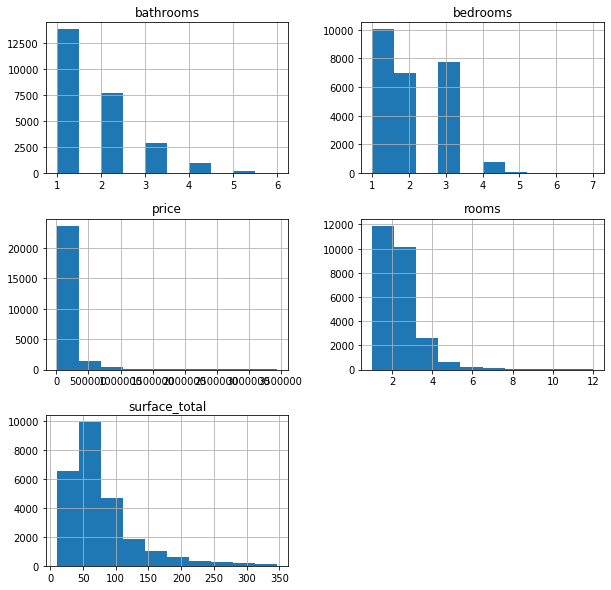

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df_train.hist(ax = ax)
plt.show()

In [66]:
df_train.skew()

rooms            1.222084
bedrooms         0.522811
bathrooms        1.378065
surface_total    2.081696
price            6.026587
dtype: float64

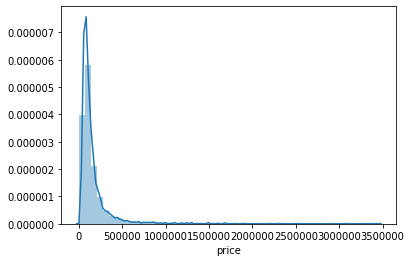

In [67]:
## ENCONTRAMOS UN SESGO ALTO PARA LA TARGET QUE SE TENDRA QUE CORREGIR DESPUES PARA UN MEJOR MODELADO
sns.distplot(df_train['price'])
plt.show()

### Visualizacion de precio medio para cada ciudad 

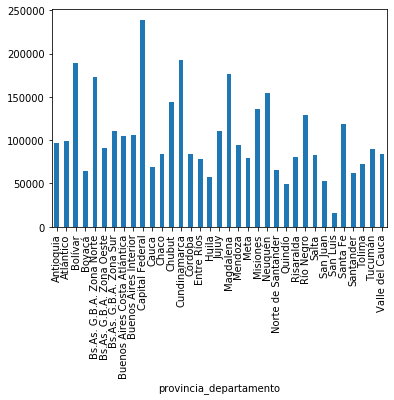

In [68]:
df_train.groupby('provincia_departamento')['price'].mean().plot(kind='bar')
plt.show()

#### VISUALIZACION

In [69]:
df_col  = df_train[df_train['pais']=='Colombia']
df_arg  = df_train[df_train['pais']=='Argentina']

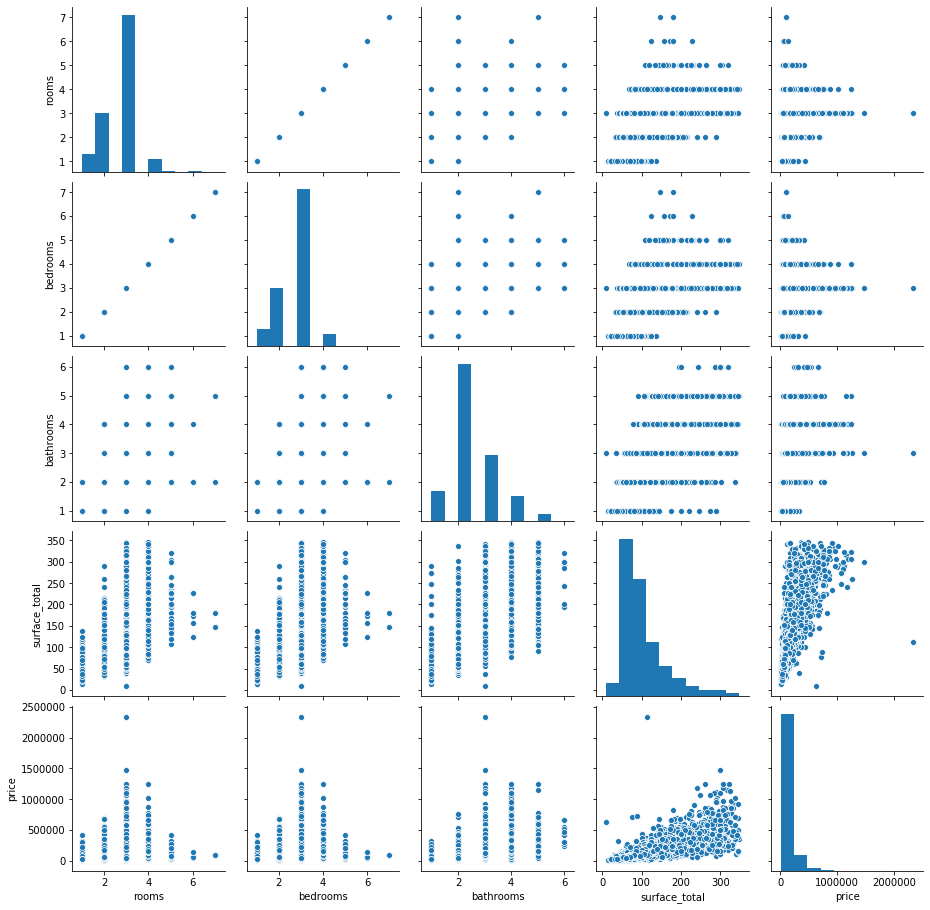

In [70]:
## REPRESENTACION GRAFICA PARA COLOMBIA
sns.pairplot(df_col)

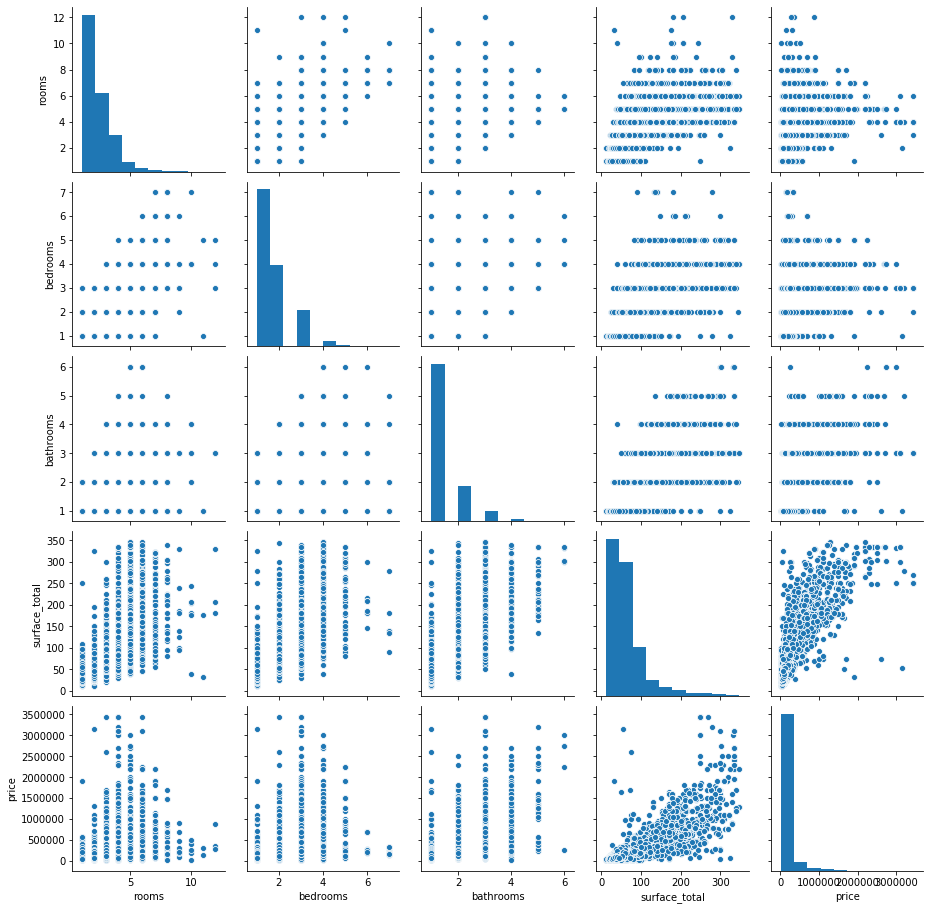

In [71]:
## REPRESENTACION GRAFICA PARA COLOMBIA
sns.pairplot(df_arg)

#### OUTLIERS

C:\Users\Usurio\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


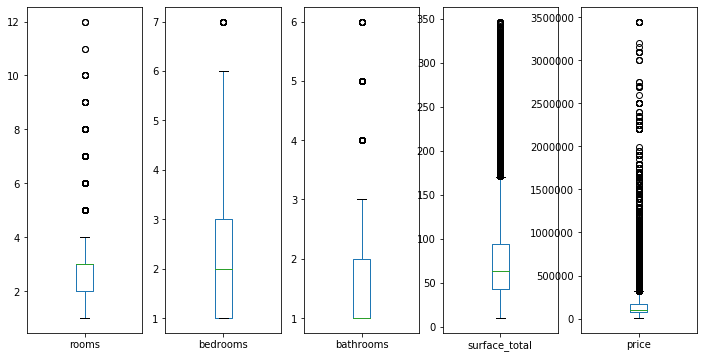

In [72]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
df_train.plot(kind='box', subplots=True, ax=ax)
plt.show()


## AUNQUE SE EVIDENCIA QUE EXISTEN UNA GRAN CANTIDAD DE OUTLIERS PARA EL PRECIO Y EL SURFACE SE DEBEN MANTENER
## EN EL DATASET POR LA GRAN CANTIDAD DE DATOS QUE SE PERDERIAN

#### CORRELACION

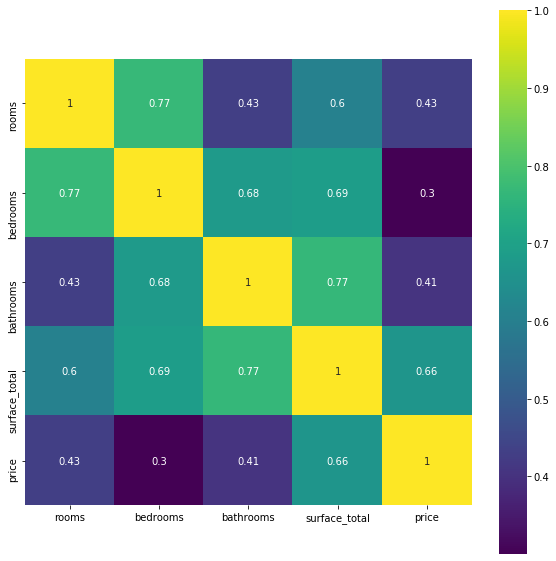

In [73]:
corr = df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True,cmap='viridis')
plt.show()

In [74]:
corr_target = abs(corr['price'])
corr_target

rooms            0.430070
bedrooms         0.300356
bathrooms        0.405673
surface_total    0.664942
price            1.000000
Name: price, dtype: float64

#### SEPARACION DE DATOS 

In [5]:
from sklearn.preprocessing import StandardScaler
escaler = StandardScaler()
df_train['price'] = escaler.fit_transform(df_train[['price']])

In [6]:
## SELECCION DE DATOS
X= df_train.drop('price', axis='columns')
Y = df_train['price']

categorical = X.select_dtypes(include=['object']).columns
##numerical = X.select_dtypes(include=['float64']).columns

In [349]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### PRIMERA LINEA DE MODELADO

In [350]:
Transfrom = [('Standarize', StandardScaler(), numerical),('Categorical', OneHotEncoder(handle_unknown='ignore'), categorical)]
col_trans = ColumnTransformer(transformers=Transfrom)

pipelines = []
pipelines.append(('LR', Pipeline(steps=[('prepro', col_trans), ('LR', LinearRegression())])))
pipelines.append(('LS', Pipeline(steps=[('prepro', col_trans), ('LS', Lasso())])))
pipelines.append(('RG', Pipeline(steps=[('prepro', col_trans), ('RG', Ridge())])))
pipelines.append(('SV', Pipeline(steps=[('prepro', col_trans), ('SV', SVR())])))
pipelines.append(('DS', Pipeline(steps=[('prepro', col_trans), ('DS', DecisionTreeRegressor())])))
pipelines.append(('KN', Pipeline(steps=[('prepro', col_trans), ('LS', KNeighborsRegressor())])))



results = []
names = []

for name, models in pipelines:
    kfol = KFold(n_splits=10, random_state=7, shuffle=True)
    results_cross = cross_val_score(models, X,Y, cv=kfol, scoring='neg_mean_squared_error')
    results.append(results_cross)
    names.append(name)
    print('Modelo : ', {name}, np.sqrt(abs(results_cross.mean())), 'Desviacion :',   np.sqrt(abs(results_cross.std()))         )

Modelo :  {'LR'} 0.4978088014106658 Desviacion : 0.11053102072078476
Modelo :  {'LS'} 1.0000785668075196 Desviacion : 0.15704086578835855
Modelo :  {'RG'} 0.4971321183638226 Desviacion : 0.10950407745616277
Modelo :  {'SV'} 0.3881698021722275 Desviacion : 0.11767221463648017
Modelo :  {'DS'} 0.44310281011223 Desviacion : 0.12051230454970875
Modelo :  {'KN'} 0.4123674960591476 Desviacion : 0.1157247258768317


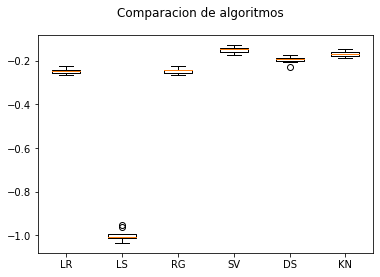

In [351]:
fig = plt.figure()
fig.suptitle('Comparacion de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Se puede observar que el mejor modelo es SVR, KN, DS

#### ELECCION DE ALGORITMO

In [329]:
df_test = pd.read_csv('test.csv')
data = df_train_original.append(df_test,sort=False)
data

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
1,1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6411,32071,Argentina,Córdoba,Córdoba,Departamento,Venta,3.0,1.0,1.0,72.0,USD,NaN
6412,32072,Argentina,Capital Federal,Recoleta,Departamento,Venta,1.0,1.0,1.0,39.0,USD,NaN
6413,32073,Argentina,Capital Federal,Caballito,Departamento,Venta,4.0,2.0,1.0,86.0,USD,NaN
6414,32074,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,2.0,76.0,USD,NaN


In [330]:
categorical = data.select_dtypes(include=['object']).columns
numerical_cols = ['rooms','bedrooms','bathrooms','surface_total']


In [331]:
data = pd.get_dummies(data, columns=categorical, drop_first=True)

In [332]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data

,Id,rooms,bedrooms,bathrooms,surface_total,price,pais_Colombia,provincia_departamento_Atlántico,provincia_departamento_Bolívar,provincia_departamento_Boyacá,...,ciudad_Villa Santa Rita,ciudad_Villa Soldati,ciudad_Villa Urquiza,ciudad_Villa del Parque,ciudad_Villa del Rosario,ciudad_Yerba Buena,ciudad_Yumbo,ciudad_Zapala,ciudad_Zipaquirá,property_type_Departamento
0,0,-0.639815,-1.058218,-0.761485,-0.790237,85000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3.300231,2.146308,2.589661,4.176783,1590000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0.345196,1.078133,1.472613,0.305151,85329.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.345196,1.078133,-0.761485,-0.355859,22846.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.345196,0.009957,-0.761485,-0.639149,80000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,32071,0.345196,-1.058218,-0.761485,-0.129227,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6412,32072,-1.624827,-1.058218,-0.761485,-0.752465,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6413,32073,1.330208,0.009957,-0.761485,0.135177,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6414,32074,0.345196,1.078133,0.355564,-0.053683,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
newTrain = data.iloc[:25660]
newTest = data.iloc[25660:]
X = newTrain.drop('price', axis='columns')
Y = newTrain['price']

In [339]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVR

pipeline = Pipeline(steps=[('Y_P',StandardScaler()),('model', SVR(kernel='rbf'))])
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())

In [340]:
model.fit(X,Y)

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
                           regressor=Pipeline(memory=None,
                                              steps=[('Y_P',
                                                      StandardScaler(copy=True,
                                                                     with_mean=True,
                                                                     with_std=True)),
                                                     ('model',
                                                      SVR(C=1.0, cache_size=200,
                                                          coef0=0.0, degree=3,
                                                          epsilon=0.1,
                                                          gamma='scale',
                                                          kernel='rbf',
                                                          max_iter=-1,
                                          

In [341]:
newTest = newTest.drop('price', axis='columns')

In [352]:
pred = model.predict(newTest)

In [353]:
sub = pd.DataFrame() 
sub['Id'] = newTest['Id']
sub['PredPrice'] = pred
sub.to_csv("submission.csv", index=False)

In [354]:
datos = pd.read_csv('submission.csv')
datos

,Id,PredPrice
0,25660,133335.065085
1,25661,112008.362874
2,25662,80404.781896
3,25663,59614.338992
4,25664,67327.249561
...,...,...
6411,32071,111173.627935
6412,32072,138718.137857
6413,32073,214381.083739
6414,32074,56581.260558
